# CRLB comparison example
The CRLB comparison process of the FD-DeepLoc includes the following steps:
1. Set the path for the trained network model
2. Load the network and plot the training process
3. Set necessary parameters
4. Check the CRLB of a local PSF at given position
5. Compare network's performance with local single-emitter CRLB

In [1]:
import pickle
import sys

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import torch

%matplotlib notebook
sns.set_style("white")
sys.setrecursionlimit(10000)

from fd_deeploc_core import *
from local_utils import *

## 1. Set the path for the trained network model.

In [2]:
network_path = "./example_data/demo2_CRLB_comparison/demo2_FD-DeepLoc.pkl"

## 2. Load the network and plot the training process.


<IPython.core.display.Javascript object>


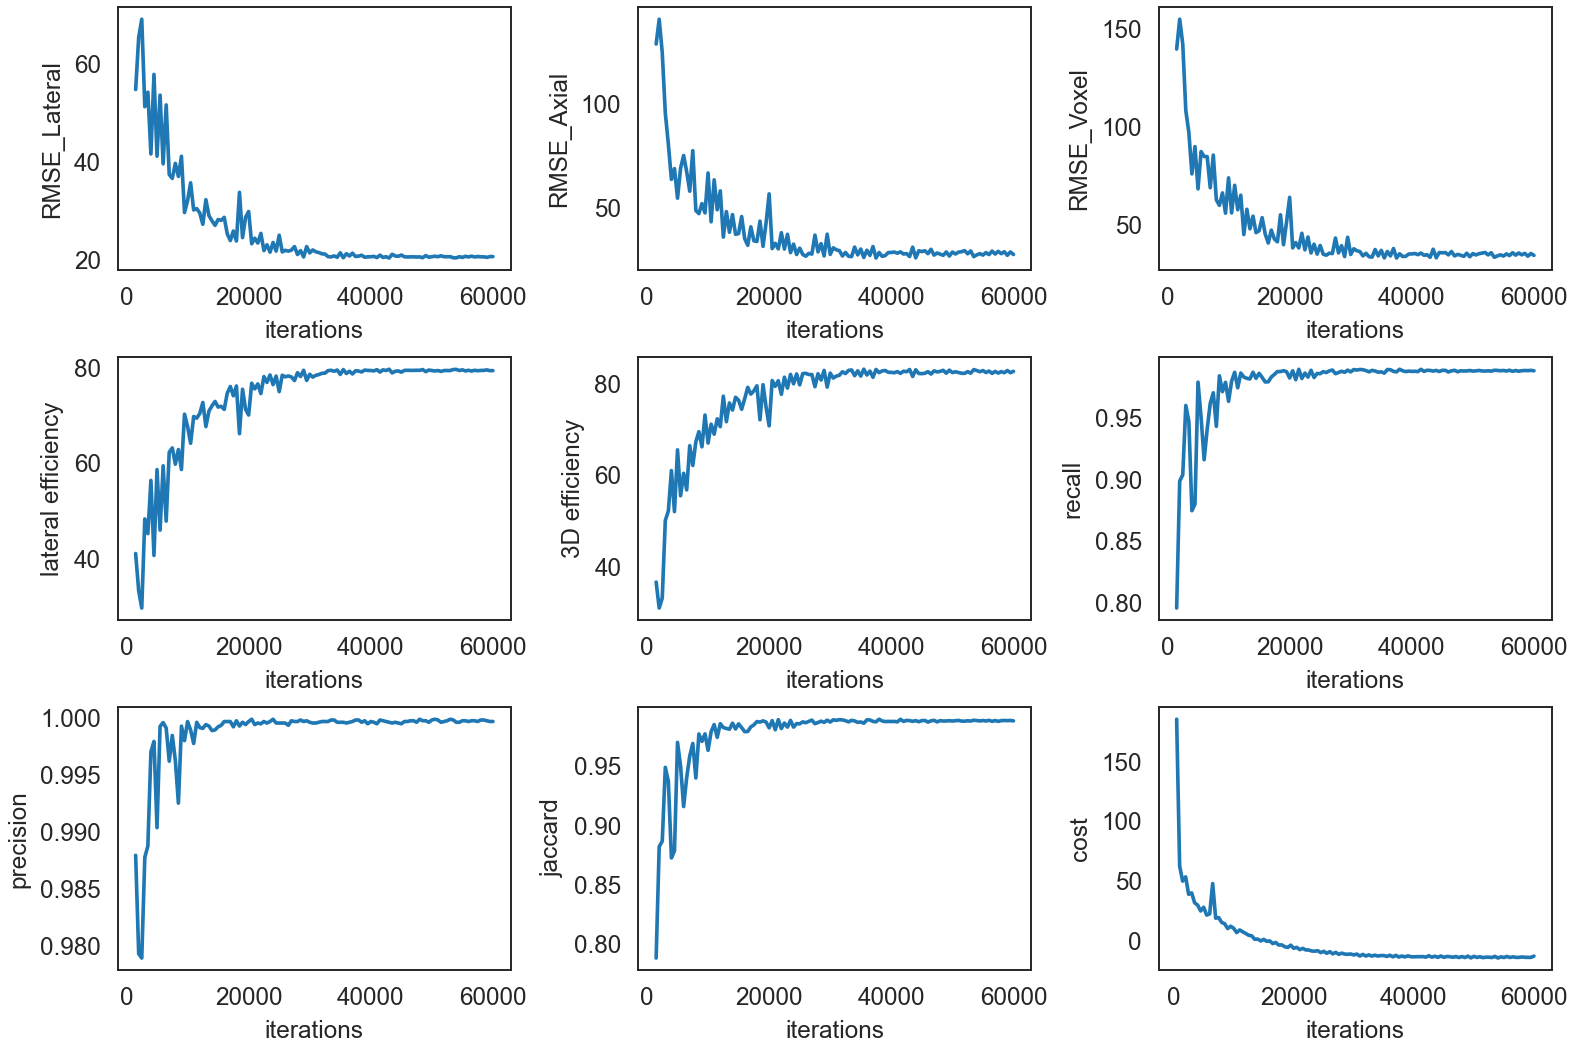

In [3]:
# load the completely trained FD_DECODE model to test or predict
with open(network_path, 'rb') as f:
    model = pickle.load(f)

# plot performance during the training
plot_train_record(model)

## 3. Set necessary parameters.
* `mol_photons` is the average number of signal photons used in training.
* `bg_photons` is the average number of background photons used in training.
* `test_pos` is the global position of the PSF whose CRLB will be computed.
* `Nmol` is the number of sampled z positions, which are uniformly distributed in the training z range.
* `test_num` is the number of simulated random PSFs at each sampled z position for RMSE evaluation, the total number of test set is $testnum*Nmol$.The xy positions for each single emitter are random in the center two pixel, the z position is random in a step range $(zrange/(Nmol-1))$ around each z position.

In [4]:
# set necessary parameters
print(model.dat_generator.psf_pars['aber_map'].shape)
bg_photons = (model.dat_generator.simulation_pars['backg'] - model.dat_generator.simulation_pars['baseline']) \
                     / model.dat_generator.simulation_pars['em_gain'] * model.dat_generator.simulation_pars['e_per_adu'] \
                     / model.dat_generator.simulation_pars['qe']
mol_photons = (model.dat_generator.simulation_pars['min_ph'] + 1) / 2 * model.dat_generator.psf_pars['ph_scale']
print('{}{}{}{}{}'.format('The average signal/background used for training are: ', int(mol_photons), '/', int(bg_photons), ' photons'))
aber_w = model.dat_generator.psf_pars['aber_map'].shape[1]
aber_h = model.dat_generator.psf_pars['aber_map'].shape[0]
test_pos_list = [[int(aber_w*0.1), int(aber_h*0.1)],
                [int(aber_w*0.9), int(aber_h*0.1)],
                [int(aber_w*0.1), int(aber_h*0.9)],
                [int(aber_w*0.9), int(aber_h*0.9)],
                [int(aber_w*0.5), int(aber_h*0.5)]]
print(test_pos_list)

Nmol = 25
test_num = 3000

(2048, 2048, 23)
The average signal/background used for training are: 4998/49 photons
[[204, 204], [1843, 204], [204, 1843], [1843, 1843], [1024, 1024]]


## 4. Check the CRLB of a local PSF at given position.
* `model` is the FD-DeepLoc model.
* `test_pos` is the global position where the PSF CRLB will be computed and checked.
* `test_photons` is the number of signal photons used to compute CRLB.
* `test_bg` is the number of background photons used to compute CRLB.
* `Nmol` is the number of sampled z positions, which are uniformly distributed in the training z range.

look PSF model at this position [204, 204]


<IPython.core.display.Javascript object>


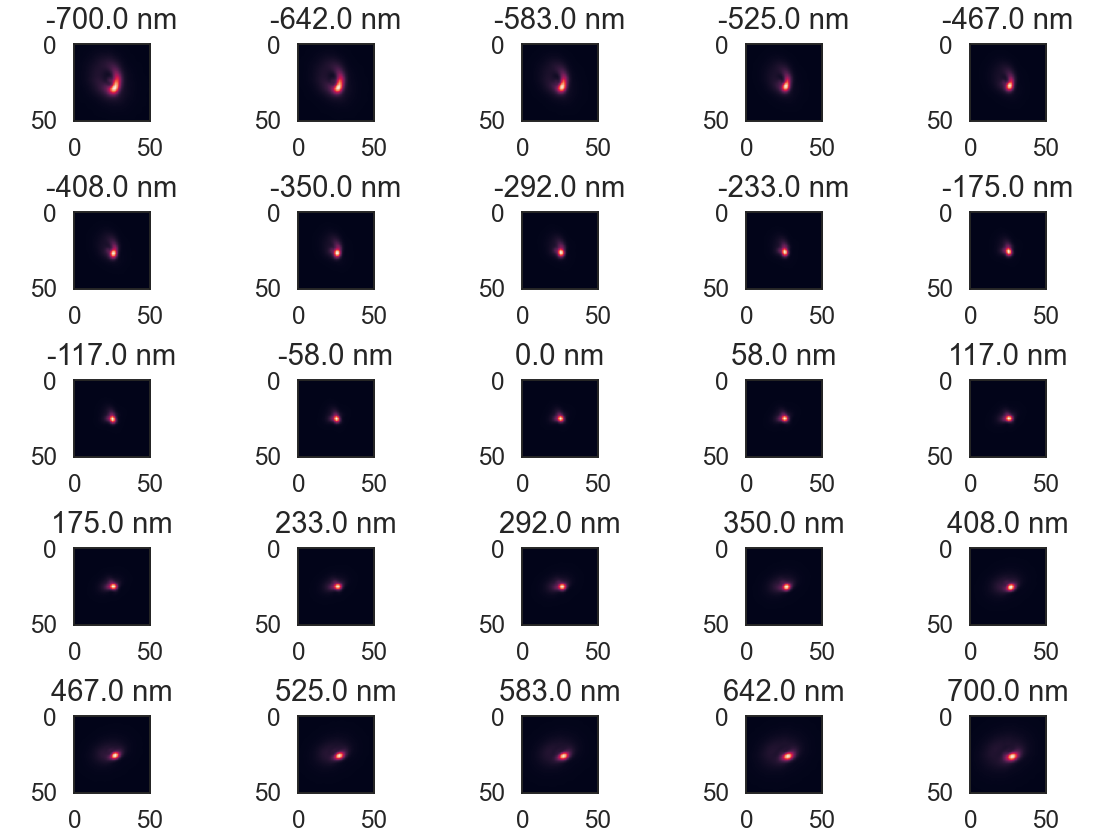

average 3D CRLB is: 810.16640625


<IPython.core.display.Javascript object>


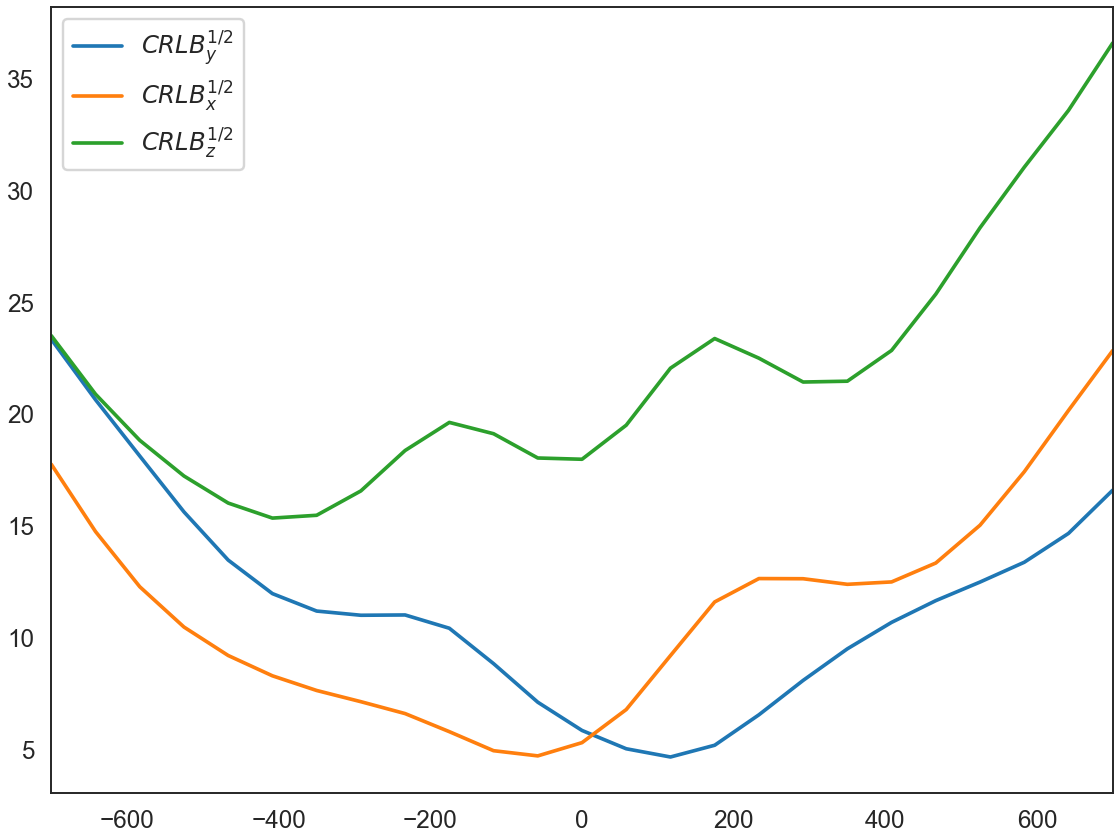

In [6]:
check_local_CRLB(model=model, test_pos=test_pos_list[0], test_photons=mol_photons, test_bg=bg_photons, Nmol=Nmol)

## 5. Compare network's performance with local single-emitter CRLB.
* `use_train_cam`: If true, the single-emitter test set will be simulated using the camera noise of training (e.g., qe, readout noise, analog-to-digital conversion factor). Otherwise only poisson noise will be added.
* `test_num` is the number of simulated random PSFs at each sampled z position for RMSE evaluation, the total number of test set is $testnum*Nmol$.The xy positions for each single emitter are random in the center two pixel, the z position is random in a step range $(zrange/(Nmol-1))$ around each z position.
* The remaining is the same as above.

compare with PSF CRLB at this position [204, 204]
average 3D CRLB is: 810.16640625
simulating single-emitter images for CRLB test
simulated 75000/75000 images
example single-emitter data for CRLB test


<IPython.core.display.Javascript object>


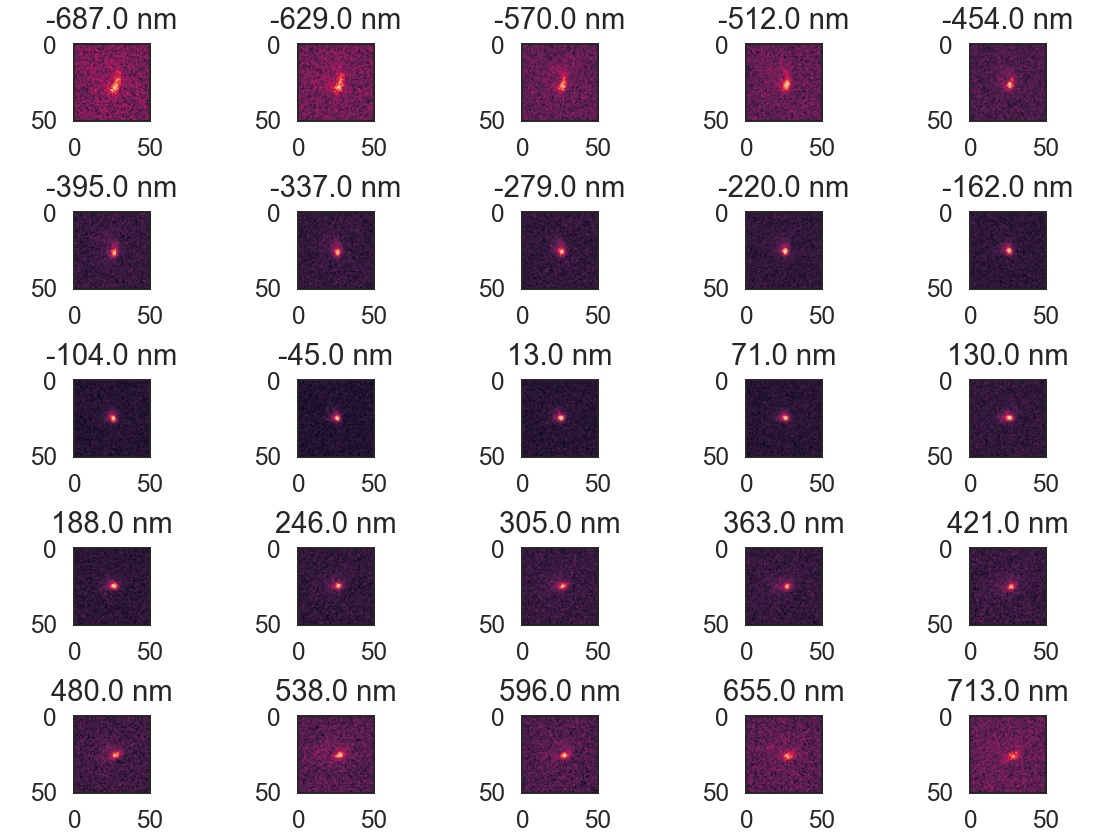

start inferring
field_xy: [178. 229. 178. 229.] , use_coordconv: True , aber_map_size: (2048, 2048, 23)


100%|███████████████████████████████████████████████████████████████████████████| 18750/18750 [02:27<00:00, 127.00it/s]


start computing evaluation metrics

evaluation on 75000 images, contain ground truth: 75000, preds:74450
FOV: x=[0, 204800] y=[0, 204800]
after FOV and border segmentation,truth: 75000 ,preds: 74450
Recall: 0.993
Precision: 1.000
Jaccard: 99.261
RMSE_lat: 19.909
RMSE_ax: 26.793
RMSE_vol: 33.381
Jaccard/RMSE: 4.986
Eff_lat: 80.077
Eff_ax: 86.583
Eff_3d: 83.330
FN: 552.0 FP: 2.0
plot the RMSE of network prediction vs CRLB


<IPython.core.display.Javascript object>


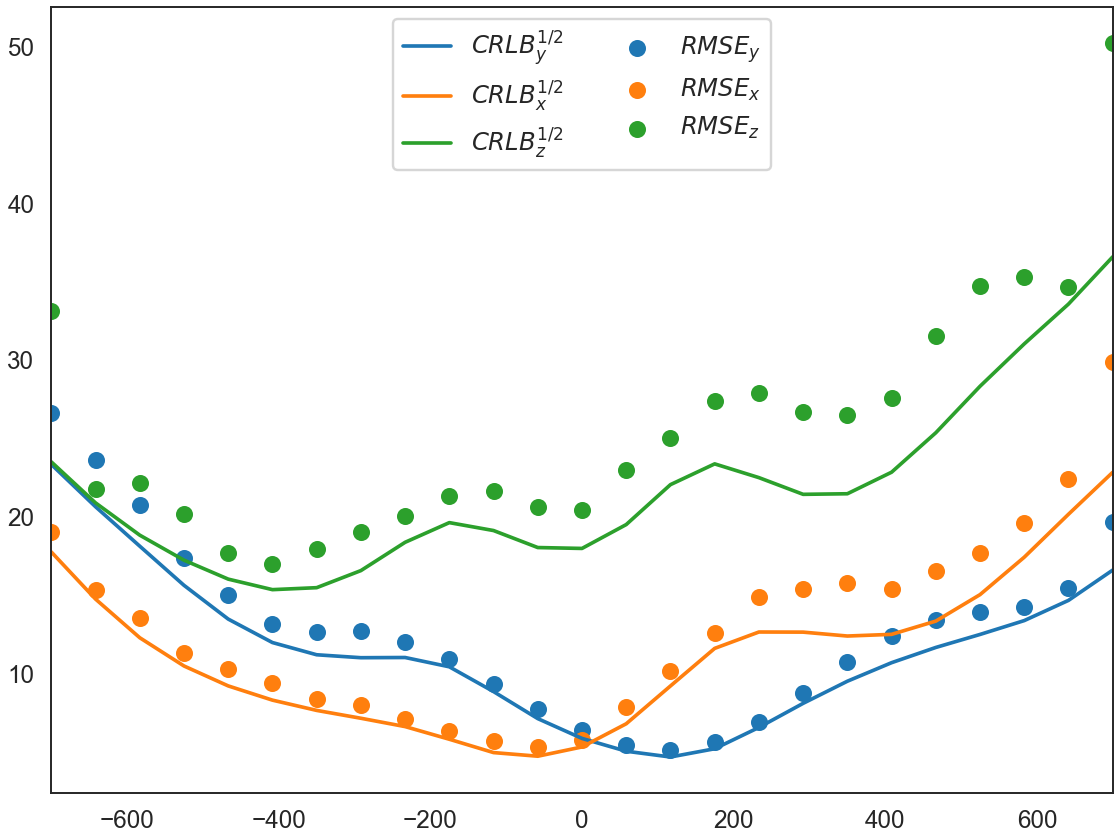

In [7]:
test_local_CRLB(model=model, test_pos=test_pos_list[0], test_photons=mol_photons, test_bg=bg_photons, Nmol=Nmol,
                use_train_cam=True, test_num=test_num)

compare with PSF CRLB at this position [1843, 204]
average 3D CRLB is: 917.211328125
simulating single-emitter images for CRLB test
simulated 75000/75000 images
example single-emitter data for CRLB test


<IPython.core.display.Javascript object>


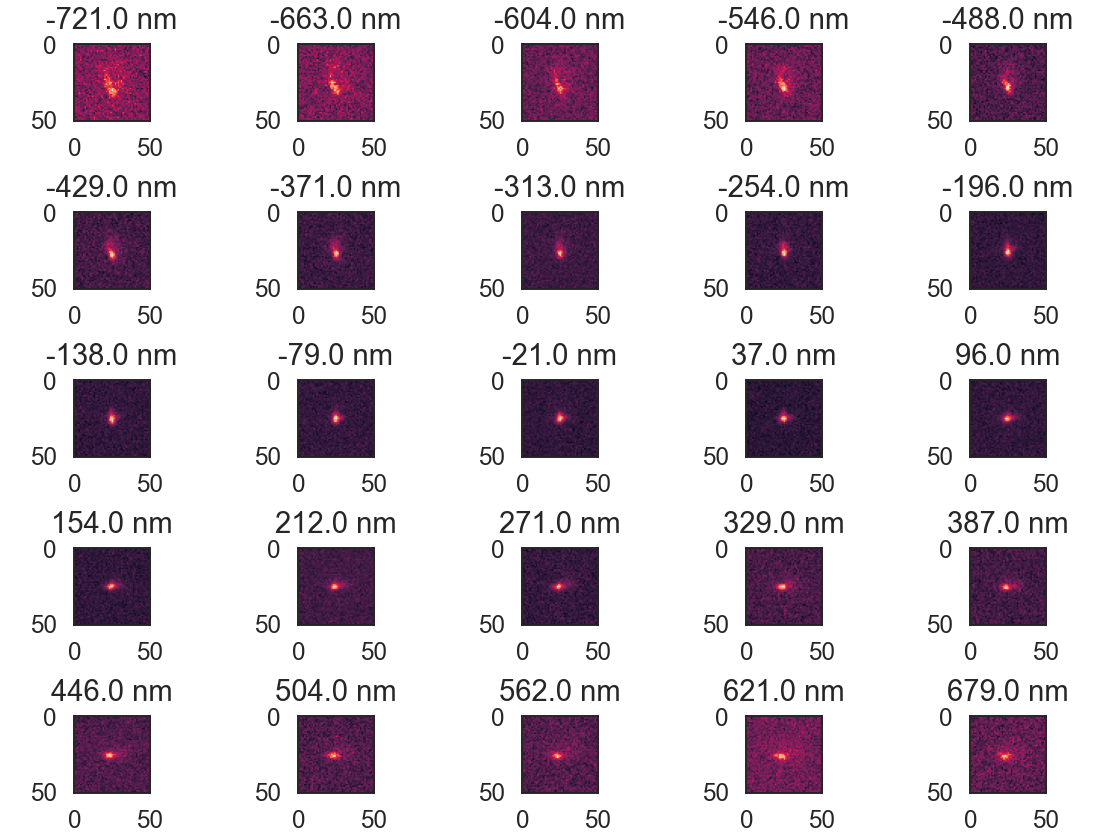

start inferring
field_xy: [1817. 1868.  178.  229.] , use_coordconv: True , aber_map_size: (2048, 2048, 23)


100%|███████████████████████████████████████████████████████████████████████████| 18750/18750 [02:26<00:00, 127.88it/s]


start computing evaluation metrics

evaluation on 75000 images, contain ground truth: 75000, preds:74253
FOV: x=[0, 204800] y=[0, 204800]
after FOV and border segmentation,truth: 75000 ,preds: 74253
Recall: 0.990
Precision: 1.000
Jaccard: 99.004
RMSE_lat: 20.412
RMSE_ax: 28.191
RMSE_vol: 34.805
Jaccard/RMSE: 4.850
Eff_lat: 79.564
Eff_ax: 85.869
Eff_3d: 82.717
FN: 747.0 FP: 0.0
plot the RMSE of network prediction vs CRLB


<IPython.core.display.Javascript object>


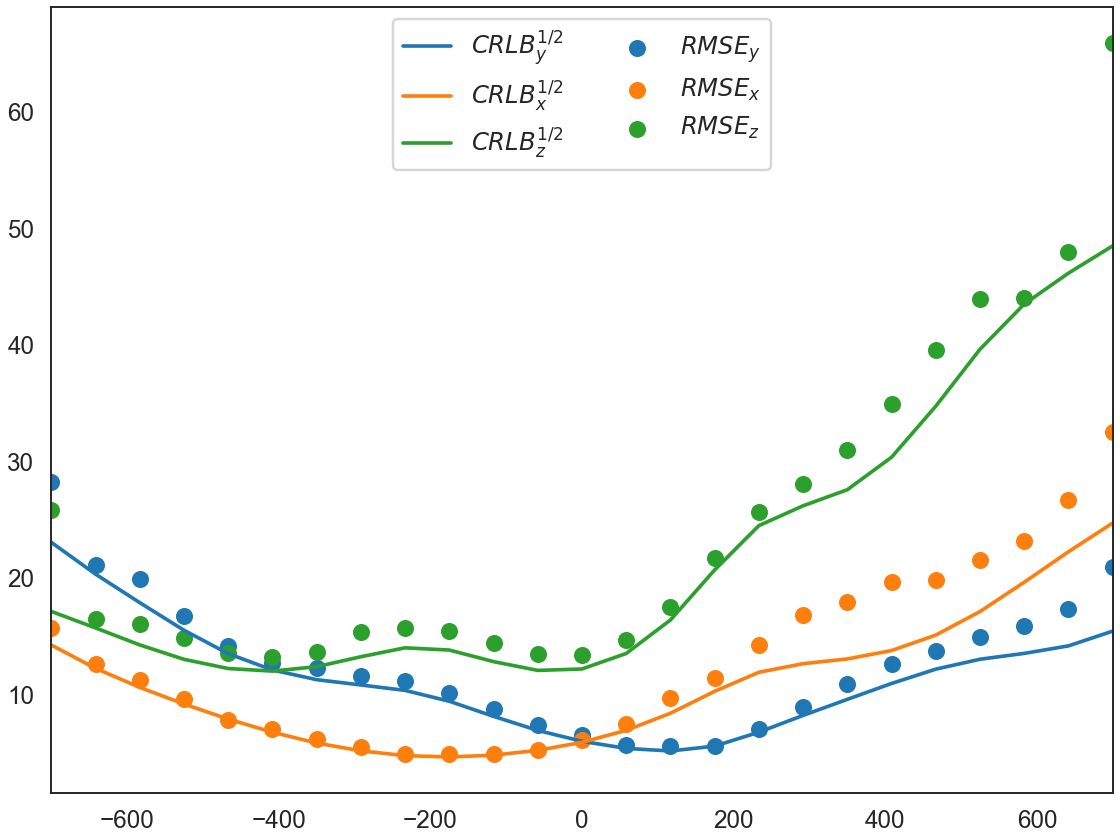

In [8]:
test_local_CRLB(model=model, test_pos=test_pos_list[1], test_photons=mol_photons, test_bg=bg_photons, Nmol=Nmol,
                use_train_cam=True, test_num=test_num)

compare with PSF CRLB at this position [204, 1843]
average 3D CRLB is: 801.308828125
simulating single-emitter images for CRLB test
simulated 75000/75000 images
example single-emitter data for CRLB test


<IPython.core.display.Javascript object>


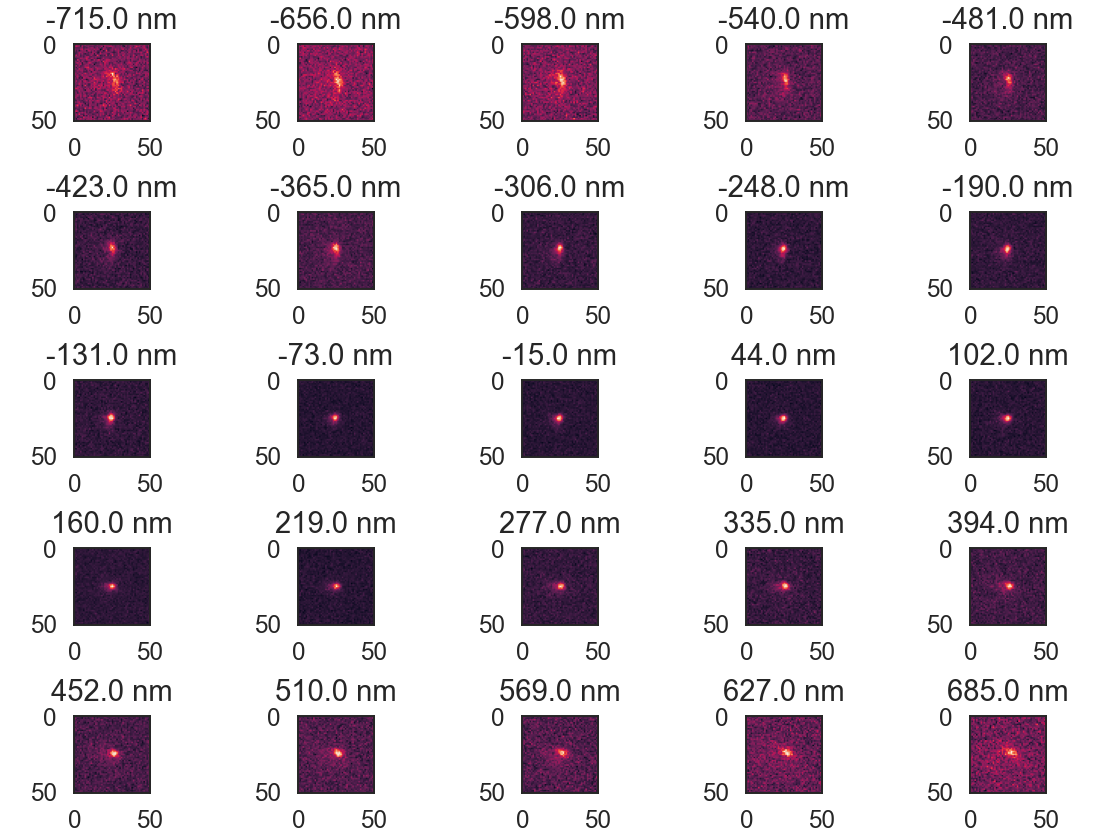

start inferring
field_xy: [ 178.  229. 1817. 1868.] , use_coordconv: True , aber_map_size: (2048, 2048, 23)


100%|███████████████████████████████████████████████████████████████████████████| 18750/18750 [02:29<00:00, 125.76it/s]


start computing evaluation metrics

evaluation on 75000 images, contain ground truth: 75000, preds:74310
FOV: x=[0, 204800] y=[0, 204800]
after FOV and border segmentation,truth: 75000 ,preds: 74310
Recall: 0.991
Precision: 1.000
Jaccard: 99.080
RMSE_lat: 19.371
RMSE_ax: 25.920
RMSE_vol: 32.359
Jaccard/RMSE: 5.115
Eff_lat: 80.607
Eff_ax: 87.007
Eff_3d: 83.807
FN: 690.0 FP: 0.0
plot the RMSE of network prediction vs CRLB


<IPython.core.display.Javascript object>


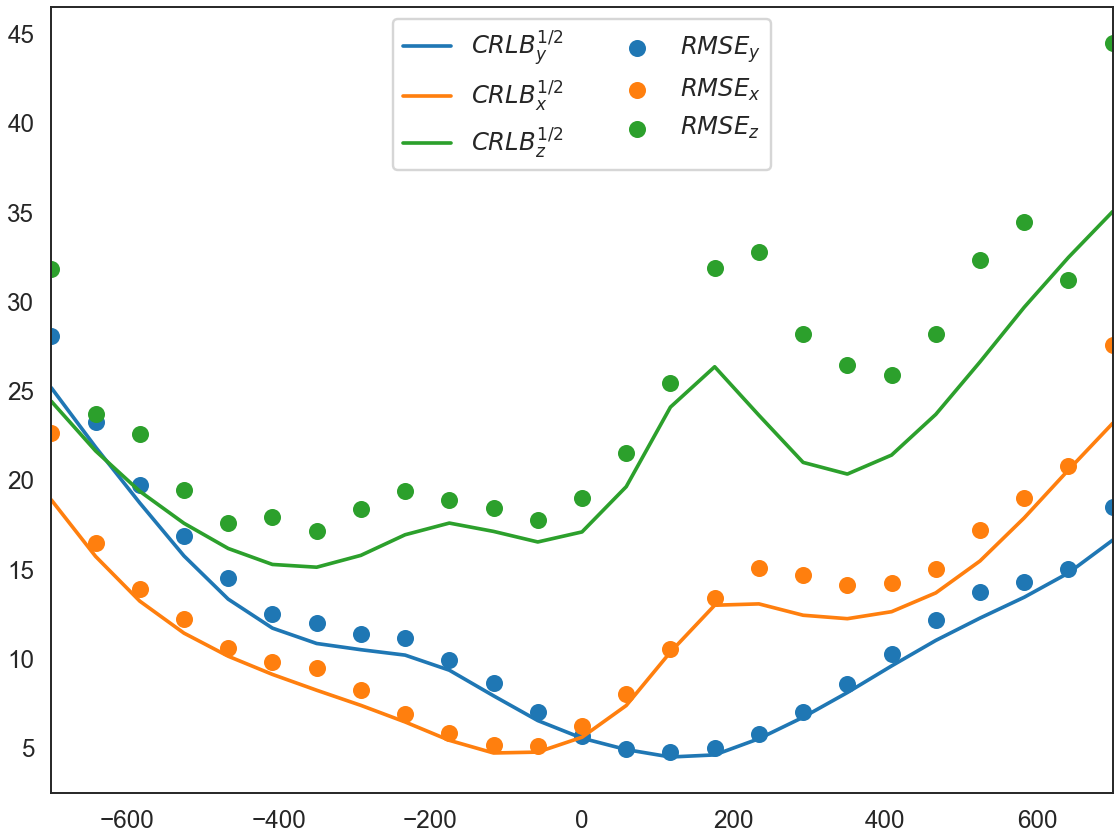

In [9]:
test_local_CRLB(model=model, test_pos=test_pos_list[2], test_photons=mol_photons, test_bg=bg_photons, Nmol=Nmol,
                use_train_cam=True, test_num=test_num)

compare with PSF CRLB at this position [1843, 1843]
average 3D CRLB is: 801.319453125
simulating single-emitter images for CRLB test
simulated 75000/75000 images
example single-emitter data for CRLB test


<IPython.core.display.Javascript object>


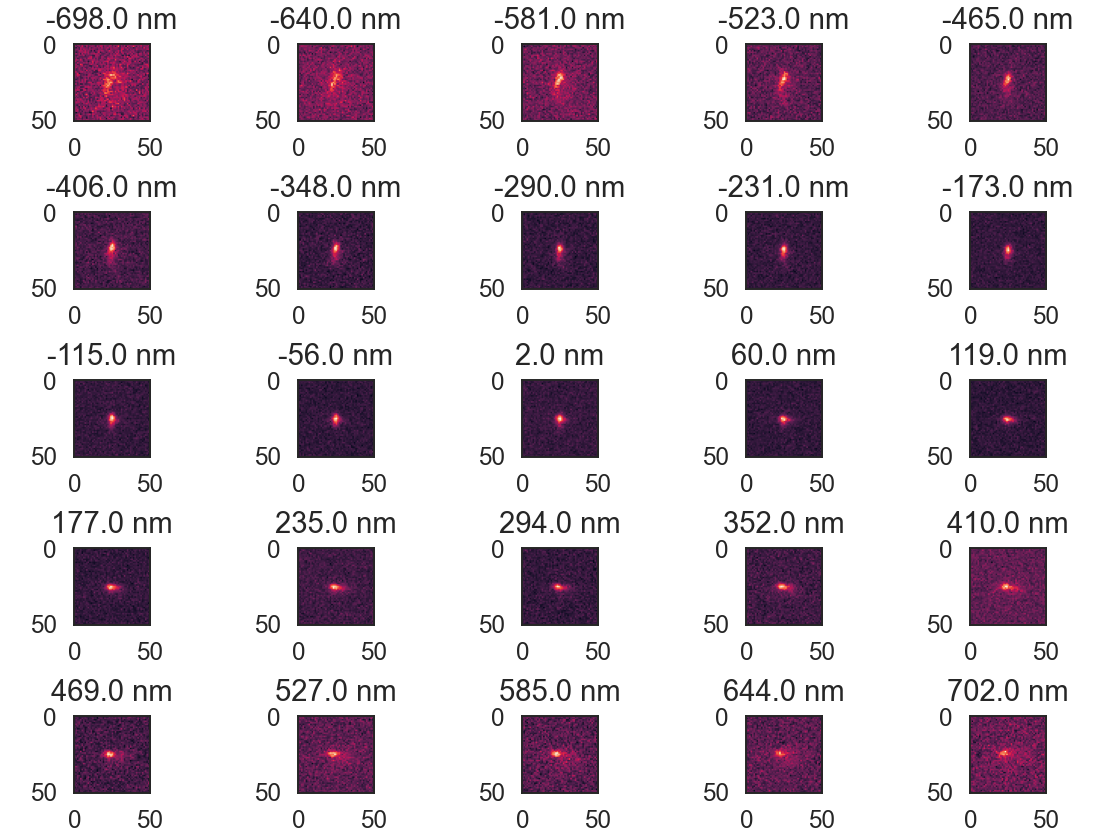

start inferring
field_xy: [1817. 1868. 1817. 1868.] , use_coordconv: True , aber_map_size: (2048, 2048, 23)


100%|███████████████████████████████████████████████████████████████████████████| 18750/18750 [02:32<00:00, 123.23it/s]


start computing evaluation metrics

evaluation on 75000 images, contain ground truth: 75000, preds:74377
FOV: x=[0, 204800] y=[0, 204800]
after FOV and border segmentation,truth: 75000 ,preds: 74377
Recall: 0.992
Precision: 1.000
Jaccard: 99.167
RMSE_lat: 21.479
RMSE_ax: 30.006
RMSE_vol: 36.901
Jaccard/RMSE: 4.617
Eff_lat: 78.505
Eff_ax: 84.974
Eff_3d: 81.739
FN: 624.0 FP: 1.0
plot the RMSE of network prediction vs CRLB


<IPython.core.display.Javascript object>


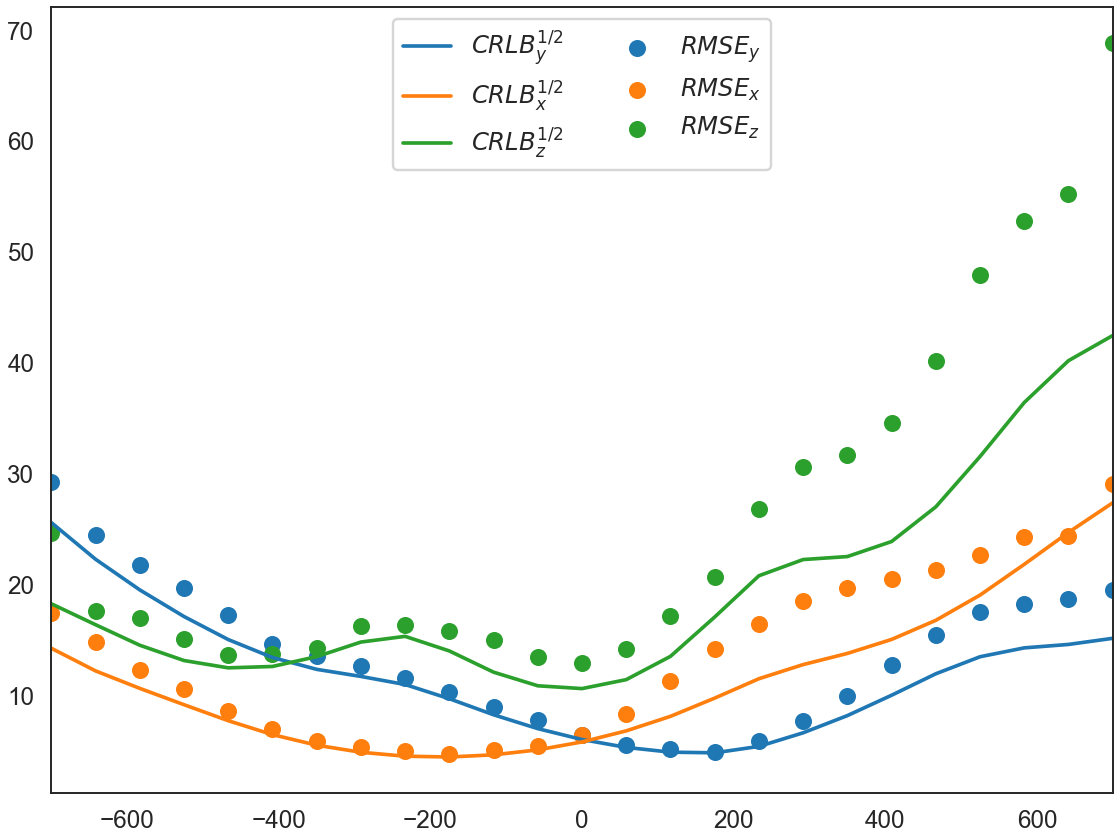

In [10]:
test_local_CRLB(model=model, test_pos=test_pos_list[3], test_photons=mol_photons, test_bg=bg_photons, Nmol=Nmol,
                use_train_cam=True, test_num=test_num)

compare with PSF CRLB at this position [1024, 1024]
average 3D CRLB is: 862.812890625
simulating single-emitter images for CRLB test
simulated 75000/75000 images
example single-emitter data for CRLB test


<IPython.core.display.Javascript object>


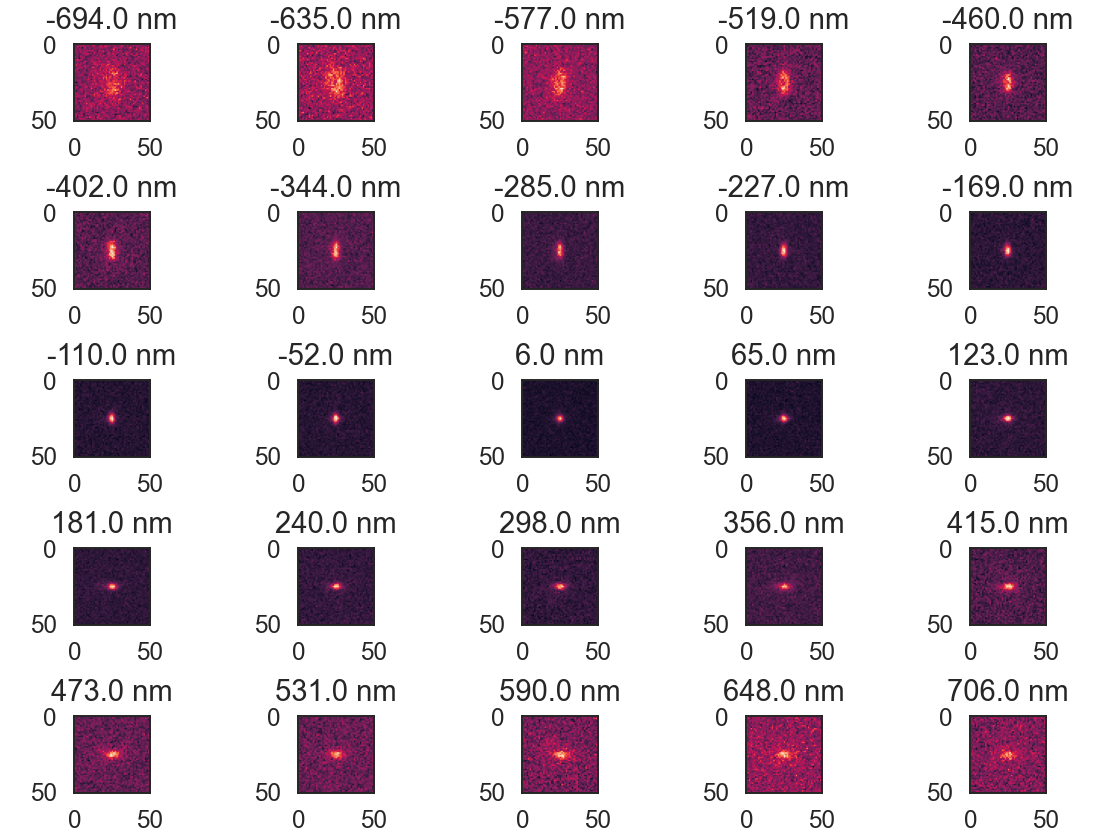

start inferring
field_xy: [ 998. 1049.  998. 1049.] , use_coordconv: True , aber_map_size: (2048, 2048, 23)


100%|███████████████████████████████████████████████████████████████████████████| 18750/18750 [02:30<00:00, 124.99it/s]


start computing evaluation metrics

evaluation on 75000 images, contain ground truth: 75000, preds:74559
FOV: x=[0, 204800] y=[0, 204800]
after FOV and border segmentation,truth: 75000 ,preds: 74559
Recall: 0.994
Precision: 1.000
Jaccard: 99.409
RMSE_lat: 19.860
RMSE_ax: 24.761
RMSE_vol: 31.742
Jaccard/RMSE: 5.006
Eff_lat: 80.131
Eff_ax: 87.605
Eff_3d: 83.868
FN: 442.0 FP: 1.0
plot the RMSE of network prediction vs CRLB


<IPython.core.display.Javascript object>


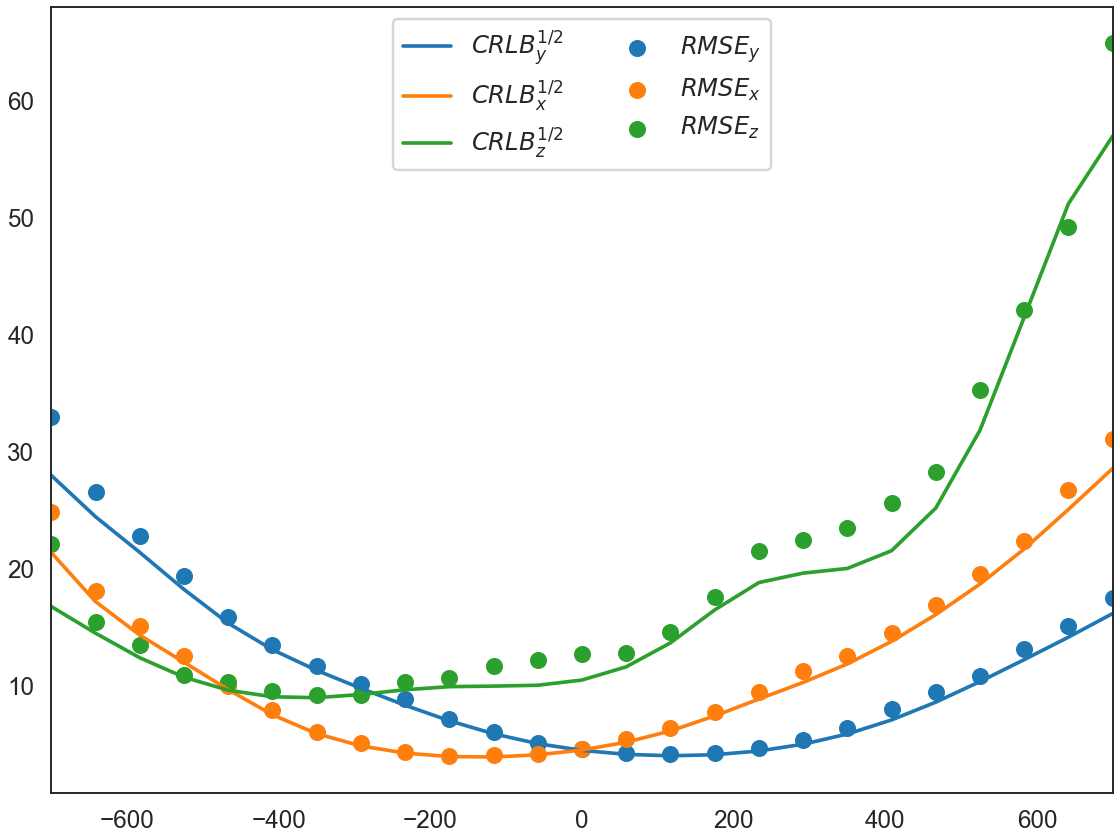

In [11]:
test_local_CRLB(model=model, test_pos=test_pos_list[4], test_photons=mol_photons, test_bg=bg_photons, Nmol=Nmol,
                use_train_cam=True, test_num=test_num)